In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
carprice_data = pd.read_csv('CarPricesData.csv')
carprice_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


## 1. Perform Initial Analysis

In [ ]:
carprice_data.shape

(1436, 10)

In [ ]:
carprice_data.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

In [ ]:
carprice_data.FuelType.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [ ]:
carprice_data.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [ ]:
carprice_data.describe(include = 'all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1434.000000,1436.000000,1432,1436.000000,1436.000000,1436.000000,1434.000000,1436.000000,1434.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.986750,68533.259749,NaN,101.502089,0.674791,0.055710,1566.990934,4.033426,1072.487448
std,3626.964585,18.581796,37506.448872,NaN,14.981080,0.468616,0.229441,187.178221,0.952677,52.672475
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


## 2. Data Cleaning

In [ ]:
np.mean(carprice_data.Age)

55.98675034867504

In [ ]:
carprice_data.Age = carprice_data.Age.fillna(value = np.mean(carprice_data.Age))

In [ ]:
carprice_data.FuelType.mode()[0]

'Petrol'

In [ ]:
carprice_data.FuelType = carprice_data.FuelType.fillna(value = carprice_data.FuelType.mode()[0])

In [ ]:
carprice_data.CC = carprice_data.CC.fillna(value = np.mean(carprice_data.CC))

In [ ]:
carprice_data.Weight = carprice_data.Weight.fillna(value = np.mean(carprice_data.Weight))

In [ ]:
carprice_data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
carprice_data['FuelType'] = le.fit_transform(carprice_data['FuelType'])

In [ ]:
carprice_data.head(20)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,1,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,1,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,1,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,1,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,1,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,1,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,1,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,1,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,2,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,1,69,0,0,1900.0,3,1105.0


In [ ]:
carprice_data.dtypes

Price          int64
Age          float64
KM             int64
FuelType       int32
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

## 3. Data Preprocessing

In [ ]:
TargetVariable=['Price']
Predictors=['Age', 'KM', 'FuelType','Weight', 'HP', 'MetColor', 'Automatic','CC', 'Doors']
 
X=carprice_data[Predictors].values
y=carprice_data[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1005, 9)
(1005, 1)
(431, 9)
(431, 1)


## 4. Model Building and Training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units = 50, input_dim = 9, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(units = 25, activation = 'tanh', kernel_initializer='normal'))
model.add(Dense(units = 1, activation = 'relu', kernel_initializer='normal'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 26        
Total params: 1,801
Trainable params: 1,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mse'])

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=50,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7132 - accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6648 - accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.0000e+00
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.0000e+00
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.0000e+00
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss:

In [ ]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 

# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 43.592275347872935
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 43.22588584971025
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 66.99751380337716
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 67.47528799375306
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 78.56559824671774
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 31.4658533492708
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 61.44163747428942
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 81.58584455377621
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 57.71505145074722
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 79.29426466173696
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 62.50024455345201
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 56.76320145395257
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 62.38196377003454
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 40.499304235382795
15 Parameters: batc

<AxesSubplot:xlabel='Parameters'>

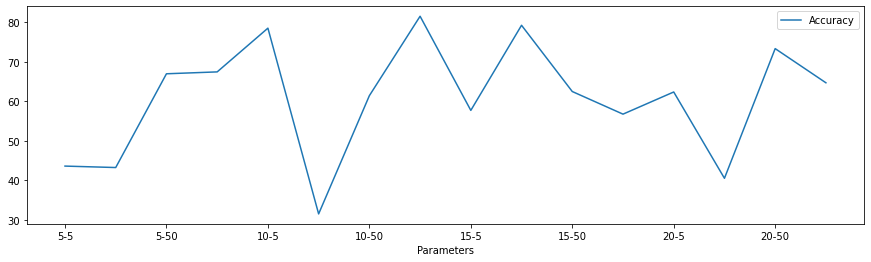

In [ ]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
model.fit(X_train, y_train ,batch_size = 10, epochs = 100, verbose=1)

Epoch 1/100
101/101 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.0000e+00
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.0000e+00
Epoch 3/100
101/101 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.0000e+00
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.0000e+00
Epoch 5/100
101/101 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.0000e+00
Epoch 6/100
101/101 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.0000e+00
Epoch 7/100
101/101 [==============================] - 0s 1ms/step - loss: 0.4341 - accuracy: 0.0000e+00
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.0000e+00
Epoch 9/100
101/101 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.0000e+00
Epoch 10/100
101/101 [==============================] -

In [ ]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 100, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,FuelType,Weight,HP,MetColor,Automatic,CC,Doors,Price,PredictedPrice
0,50.0,22500.0,2.0,1025.0,97.0,1.0,0.0,1400.0,3.0,10800.0,10730.824219
1,68.0,80426.0,2.0,1055.0,110.0,1.0,0.0,1600.0,3.0,9950.0,10730.824219
2,59.0,130000.0,1.0,1135.0,72.0,1.0,0.0,2000.0,4.0,7500.0,10730.824219
3,71.0,76000.0,2.0,1070.0,110.0,1.0,0.0,1600.0,5.0,9250.0,10730.824219
4,65.0,59000.0,2.0,1075.0,110.0,0.0,0.0,1600.0,5.0,9750.0,10730.824219


In [ ]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
 
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head(20)

The Accuracy of ANN model is: 80.37761063090839
The Accuracy of ANN model is: 80.37761063090839


,Age,KM,FuelType,Weight,HP,MetColor,Automatic,CC,Doors,Price,PredictedPrice,APE
0,50.0,22500.0,2.0,1025.0,97.0,1.0,0.0,1400.0,3.0,10800.0,10730.824219,0.640516
1,68.0,80426.0,2.0,1055.0,110.0,1.0,0.0,1600.0,3.0,9950.0,10730.824219,7.847480
2,59.0,130000.0,1.0,1135.0,72.0,1.0,0.0,2000.0,4.0,7500.0,10730.824219,43.077656
3,71.0,76000.0,2.0,1070.0,110.0,1.0,0.0,1600.0,5.0,9250.0,10730.824219,16.008910
4,65.0,59000.0,2.0,1075.0,110.0,0.0,0.0,1600.0,5.0,9750.0,10730.824219,10.059736
5,80.0,94079.0,2.0,1085.0,110.0,1.0,0.0,1600.0,5.0,9950.0,10730.824219,7.847480
6,67.0,79858.0,2.0,1040.0,110.0,1.0,0.0,1600.0,4.0,9895.0,10730.824219,8.446935
7,76.0,57263.0,2.0,1050.0,110.0,1.0,0.0,1600.0,3.0,6750.0,10730.824219,58.975174
8,33.0,51945.0,2.0,1075.0,110.0,1.0,0.0,1600.0,5.0,13450.0,13139.404297,2.309262
9,44.0,37389.0,2.0,1080.0,110.0,1.0,0.0,1600.0,5.0,12950.0,12388.801758,4.333577
